
[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Fertilizer Recommendation Model Accuracy: 95.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



/Users/devashishmudigonda/Desktop/TRANSFER DEV/Plant-Disease-Prediction-main/Plant-Disease-Prediction-main/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/devashishmudigonda/Desktop/TRANSFER DEV/Plant-Disease-Prediction-main/Plant-Disease-Prediction-main/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/devashishmudigonda/Desktop/TRANSFER DEV/Plant-Disease-Prediction-main/Plant-Disease-Prediction-main/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531

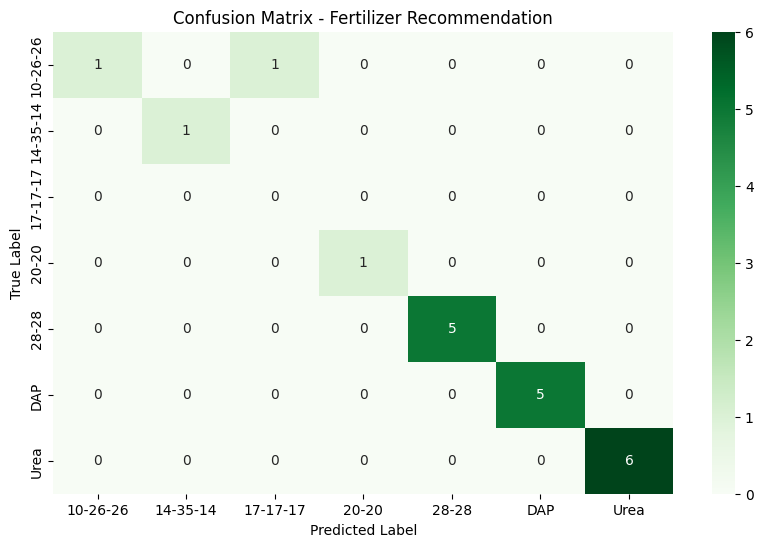

Fertilizer Recommendation Model Saved.


In [1]:
# Install necessary libraries
!pip install pandas scikit-learn joblib matplotlib seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load Fertilizer Dataset
fertilizer_data = pd.read_csv("fertilizer_info.csv")

# Encode categorical features
label_encoders = {}
for col in ["Soil Type", "Crop Type", "Fertilizer Name"]:
    le = LabelEncoder()
    fertilizer_data[col] = le.fit_transform(fertilizer_data[col])
    label_encoders[col] = le  # Store encoders for later decoding

# Prepare dataset
X_fertilizer = fertilizer_data.drop(columns=["Fertilizer Name"])
y_fertilizer = fertilizer_data["Fertilizer Name"]

# Split Data
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fertilizer, y_fertilizer, test_size=0.2, random_state=42)

# Train Random Forest Classifier
fertilizer_model = RandomForestClassifier(n_estimators=200, random_state=42)
fertilizer_model.fit(X_train_f, y_train_f)

# Make Predictions
y_pred_f = fertilizer_model.predict(X_test_f)

# **Evaluation Metrics**
fertilizer_accuracy = accuracy_score(y_test_f, y_pred_f)
print(f"Fertilizer Recommendation Model Accuracy: {fertilizer_accuracy * 100:.2f}%")

# **Classification Report**
print("\nClassification Report:\n", classification_report(y_test_f, y_pred_f))

# **Confusion Matrix**
conf_matrix_fertilizer = confusion_matrix(y_test_f, y_pred_f)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_fertilizer, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoders["Fertilizer Name"].classes_,
            yticklabels=label_encoders["Fertilizer Name"].classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fertilizer Recommendation')
plt.show()

# Save Model
joblib.dump(fertilizer_model, "fertilizer_recommendation_model.pkl")
joblib.dump(label_encoders, "fertilizer_label_encoders.pkl")  # Save encoders for later use
print("Fertilizer Recommendation Model Saved.")


In [2]:
# Load the trained fertilizer model
import joblib
import pandas as pd

# Load the trained model and label encoders
fertilizer_model = joblib.load("fertilizer_recommendation_model.pkl")
label_encoders = joblib.load("fertilizer_label_encoders.pkl")

# Example input values for prediction (Modify based on your dataset)
sample_input = [[30, 60, 45, 1, 3, 40, 20, 25]]  # [Temperature, Humidity, Moisture, Soil Type, Crop Type, N, P, K]

# Predict the recommended fertilizer (returns label-encoded value)
predicted_label = fertilizer_model.predict(sample_input)[0]

# Convert label-encoded prediction back to actual fertilizer name
predicted_fertilizer = label_encoders["Fertilizer Name"].inverse_transform([predicted_label])[0]

print(f"Recommended Fertilizer: {predicted_fertilizer}")


Recommended Fertilizer: Urea


/Users/devashishmudigonda/Desktop/TRANSFER DEV/Plant-Disease-Prediction-main/Plant-Disease-Prediction-main/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
